# Exploratory Data Analysis of the Car Evaluation Data Set

## Summary of data set

The data set analyzed in this project was primarily collected in June, 1997 by Marko Bohanec to evaluate HINT (Hierarchy INduction Tool), which is presented in B. Zupan, M. Bohanec, I. Bratko, J. Demsar: Machine learning by function decomposition. ICML-97, Nashville, TN. 1997. The data can be accessed from the <a href="https://archive-beta.ics.uci.edu/dataset/19/car+evaluation" target="_blank">UC Irvine Machine Learning Repository</a> and follows an <a href="https://creativecommons.org/licenses/by/4.0/legalcode" target="_blank">Creative Commons Attribution 4.0 International License</a>.  

There are 1728 observations in the data set. Each row represents an individual car with one target and six input attributes. The target includes four classes like unacc, acc, good, and vgood. The six input attributes are overall price (buying), price of the maintenance (maint), number of doors (doors), capacity in terms of persons to carry (persons), the size of luggage boot (lug_boot) and the safety of the car (safety).  

We want to study the estimated the popularity/acceptability of cars (class) based on six input features.

## Read and split data into training and test sets

In [1]:
import altair as alt
import pandas as pd
from sklearn.model_selection import train_test_split
# reference to DSCI 531
# Save a vega-lite spec and a PNG blob for each plot in the notebook
alt.renderers.enable('mimetype')
# Handle large data sets without embedding them in the notebook
alt.data_transformers.enable('data_server')

DataTransformerRegistry.enable('data_server')

In [2]:
# add col names
colnames=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'] 
# load raw data  
car = pd.read_csv('../data/raw/raw_data.csv', names = colnames, header = 0)
# we only use train data for our EDA, set seed for reproducibility
train_df, test_df = train_test_split(car, test_size=0.10, random_state=522)
# view first 5 rows of car training set 
train_df.head()

,buying,maint,doors,persons,lug_boot,safety,class
1625,low,low,2,2,med,high,unacc
210,vhigh,high,5more,more,med,low,unacc
755,high,med,5more,more,big,high,acc
1113,med,med,3,2,big,low,unacc
959,med,vhigh,5more,4,med,high,acc


We have split 90% of observations in the training set and 10% of observation in the test set. Table 1 lists the counts of observations for each class as below.

In [3]:
%%html
<style>
table {float:left}
</style>

| Data partition | Number of observation |
| :------------- | -----------:          |
| Training       |              1555     |
| Test           |               173     |


Table 1. Counts of observations for training and test set

## EDA for Categorical Variables

In [3]:
# check missing values and data types
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1555 entries, 1625 to 1312
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1555 non-null   object
 1   maint     1555 non-null   object
 2   doors     1555 non-null   object
 3   persons   1555 non-null   object
 4   lug_boot  1555 non-null   object
 5   safety    1555 non-null   object
 6   class     1555 non-null   object
dtypes: object(7)
memory usage: 97.2+ KB


There is no missing value for all 1555 observations in the training set. The data type of all variables are object and according to the introduction we know all of them are categorical data.

In [4]:
train_df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1555,1555,1555,1555,1555,1555,1555
unique,4,4,4,3,3,3,4
top,vhigh,med,4,4,med,high,unacc
freq,399,394,393,528,528,527,1086


We have 6 input features and 1 response variable with multivariate classes of 3 or 4.

* Frequency Distribution of target car acceptability class 

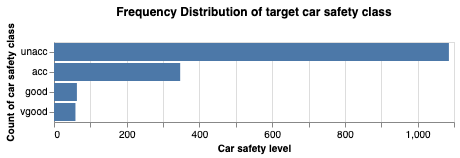

In [5]:
alt.Chart(train_df, title = 'Frequency Distribution of target car safety class').mark_bar().encode(
    x=alt.X('count()', title = 'Car safety level'),
    y=alt.Y('class', sort='-x', title = 'Count of car safety class')
).configure_axis(
    labelFontSize=10,                                                
    titleFontSize=10).configure_title(
    fontSize=12)


* We have a quite imbalanced training data, so we might need to use SMOTE or other oversampling/Undersampling methods.

2. Side by Side counting combinations of categorical groups.

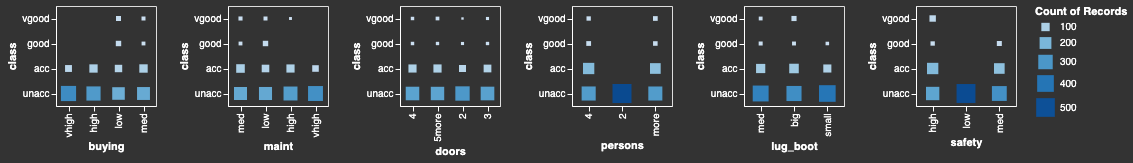

In [6]:
train_df = train_df.applymap(str)
alt.Chart(train_df).mark_square().encode(
    x=alt.X(alt.repeat(), sort='-color'),
    y=alt.Y('class', sort='color'),
    color='count()',
    size='count()').properties(
    width=100,
    height=100
).repeat(
    ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
)

* We can see for factors buying, maint, doors and lug_boot, the count of each category is about the same for unacceptable class. But for safety and capacity of car, less capacity and lower safety is associated with lower popularity. Since all of our variables are categorical variables, we can set regression tree as our baseline model and maybe use random forest as our advanced model. 